## Project Name: House Prices: Advanced Regression Techniques

The main aim of this project is to predict the house price based on various features.

#### The following dataset from a kaggle competition is used in this project.
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
## Data Analysis Phase
## Main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the columns of the dataframe

# We only want to see all the columns, but if we provided max_rows, it would have selected all the rows!
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(1460, 81)


In [3]:
## print the top5 records. The previous output says that the train dataset has 1460 (examples) rows and 81 columns (features)
## We will print only the top 5 rows to see how the data looks like

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### In Data Analysis, we need figure out the following issues:

1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables (check if its skewed - in that case, we might need to do some transformation.)
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

# 1. Find out the missing values

In [4]:
## Lets have a look how data frame works and how can we find nan valuee. This is just to show how isnull works.

df = pd.DataFrame([['ant', np.nan, '10'], ['dog', np.nan, np.nan]])
print(df)

#df.isna().sum(axis='columns')
#df.sum(axis = 1, skipna = True)

df.isnull().sum()

     0   1    2
0  ant NaN   10
1  dog NaN  NaN


0    0
1    2
2    1
dtype: int64

In [6]:
## Now we will check the percentage of nan values present in each feature

## First, make the list of features which has missing values
#features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]
print('The features are: ' , features_with_na , "\n")
## Second, print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean() * 100, 2),  ' % missing values', ' and total number: ', dataset[feature].isnull().sum())
    
    

The features are:  ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'] 

LotFrontage 17.74  % missing values  and total number:  259
Alley 93.77  % missing values  and total number:  1369
MasVnrType 0.55  % missing values  and total number:  8
MasVnrArea 0.55  % missing values  and total number:  8
BsmtQual 2.53  % missing values  and total number:  37
BsmtCond 2.53  % missing values  and total number:  37
BsmtExposure 2.6  % missing values  and total number:  38
BsmtFinType1 2.53  % missing values  and total number:  37
BsmtFinType2 2.6  % missing values  and total number:  38
Electrical 0.07  % missing values  and total number:  1
FireplaceQu 47.26  % missing values  and total number:  690
GarageType 5.55  % missing values  and total number:  81
GarageYrBlt 5.55  % missing value

### Before starting to visualize, lets have a look how we can play with dataframes and null values. Explain what happens below. Uncheck code comments and explore (Now you know it! Yeay!)

In [128]:
# Lets create a mock df to learn a bit more
df1=pd.DataFrame(np.arange(0,20).reshape(5,4),index=['Row1','Row2','Row3','Row4','Row5'],columns=["Column1","Column2","Column3","Column4"])
f_select=['Column1', 'Column2']
df1.at['Row1', 'Column1'] = 3
df1.at['Row1', 'Column2'] = 4
df1.at['Row3', 'Column1'] = 3
df1.at['Row3', 'Column2'] = 4
print(df1, f, sep='\n')

      Column1  Column2  Column3  Column4
Row1        3        4        2        3
Row2        4        5        6        7
Row3        3        4       10       11
Row4       12       13       14       15
Row5       16       17       18       19
Column2


Column1
      Column1  Column2  Column3  Column4
Row1        1        1        2        3
Row2        0        0        6        7
Row3        1        1       10       11
Row4        0        0       14       15
Row5        0        0       18       19


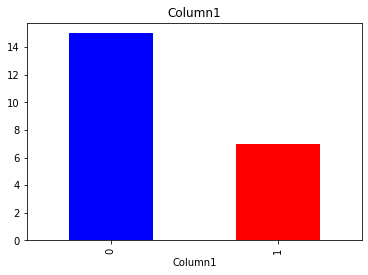

Column2
      Column1  Column2  Column3  Column4
Row1        1        0        2        3
Row2        0        1        6        7
Row3        1        0       10       11
Row4        0        1       14       15
Row5        0        1       18       19


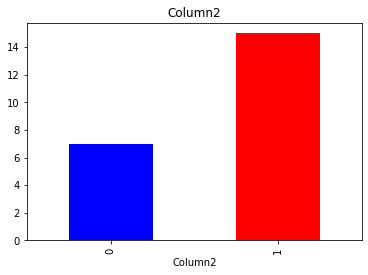

In [130]:
# See how you can change the values in each cell. Note how the loop works here... too basic?
for f in f_select:
    print(f)
    df1[f] = np.where(df1[f]%2==0,1,0)
    print(df1)
    #break
    df1.groupby(f)['Column4'].median().plot.bar(color=['blue', 'red'])
    plt.title(f)
    plt.show()

### Now we will find the relationship between missing values and Sales Price (dependent variable)
We will only observe how the missing values are related with dependant variable (sales price). We will handle these missing values in feature engineering later on.

#### Let's plot some diagram for this relationship


LotFrontage


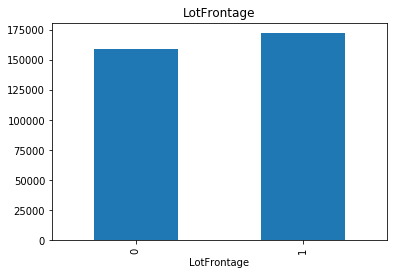

Alley


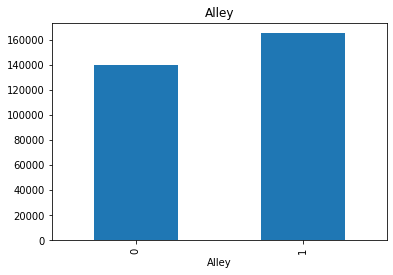

MasVnrType


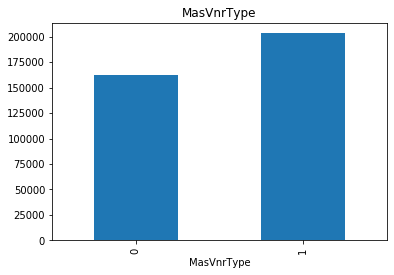

MasVnrArea


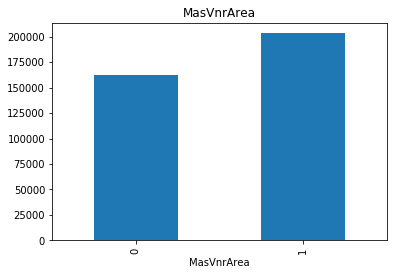

BsmtQual


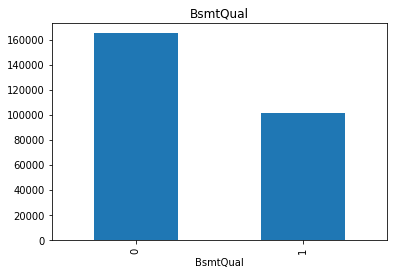

BsmtCond


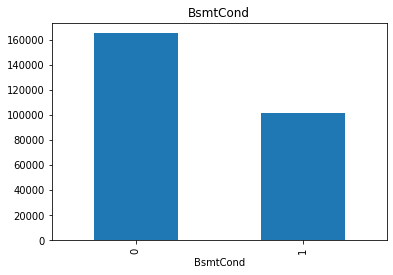

BsmtExposure


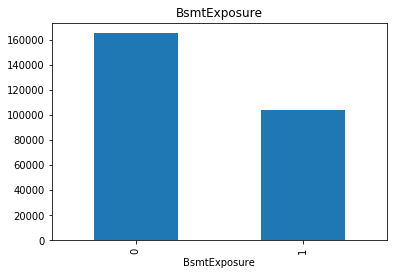

BsmtFinType1


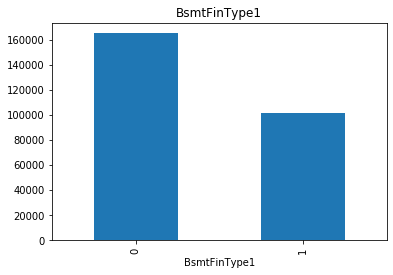

BsmtFinType2


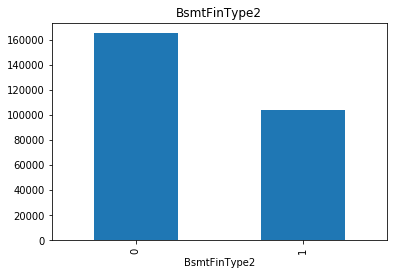

Electrical


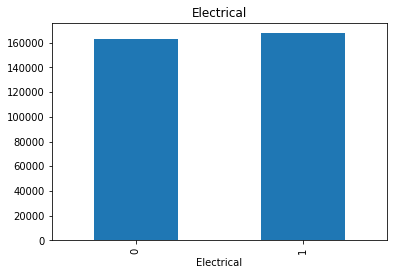

FireplaceQu


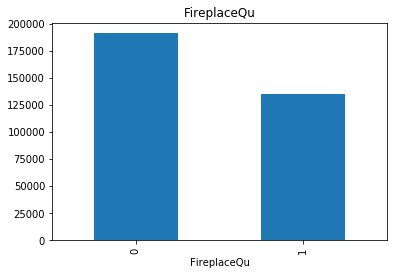

GarageType


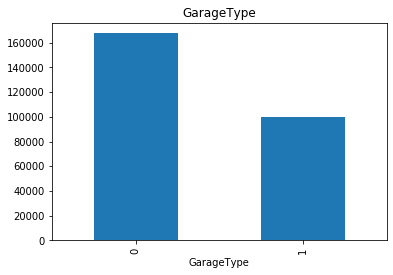

GarageYrBlt


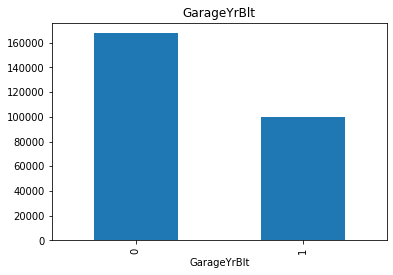

GarageFinish


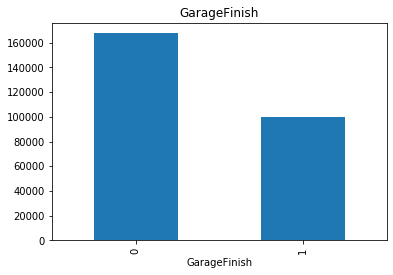

GarageQual


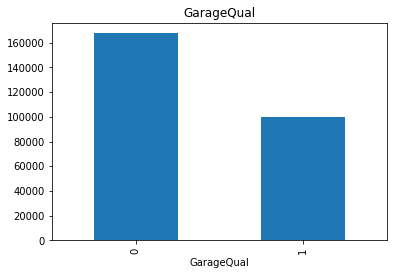

GarageCond


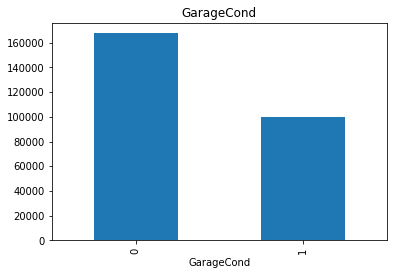

PoolQC


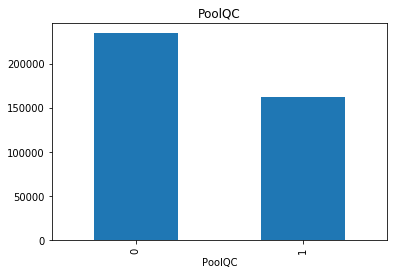

Fence


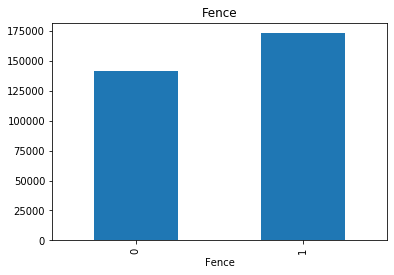

MiscFeature


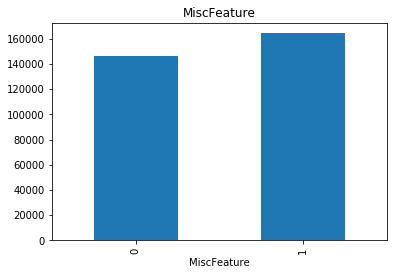

In [96]:
data = dataset.copy()
#print(data.head())
for feature in features_with_na: 
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    #print(data.head())
    # let's calculate the mean SalePrice where the information is missing or present
    #print(feature)
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['blue', 'red'])
    plt.title(feature)
    plt.show()

#### The graphs above show that the nan values play important role in sales price. Therefore, we need to find some way to replace these nan value with some meaningful data which we will do in feature engineering. At this moment, we just cant drop those rows containing nan values.

Now, there are some columns which are not necessary for our prediction model, for example, ID. Lets check how many of them are and are they unique IDs? 

In [143]:
print("Number of unique IDs in the dataset: " + str(len(np.unique(dataset.Id))) )

Number of unique IDs in the dataset: 1460


# 2. Find how many features contain numerical value.
This is important to handle non-numerical values as well.

In [151]:
# Lets see how we can see a data type
print('The column MSSubClass has data type: ', dataset['MSSubClass'].dtypes)
print('The column MasVnrArea has data type: ', dataset['MasVnrArea'].dtypes)
print('The column RoofStyle has data type: ', dataset['RoofStyle'].dtypes)

The column MSSubClass has data type:  int64
The column MasVnrArea has data type:  float64
The column RoofStyle has data type:  object


In [165]:
# The above cell shows that we can discard the strings (objects) and find numerical values (int or float).
# Lets write another list comprehension

# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('{} numerical variables out of {} variables'.format(len(numerical_features), len(dataset.columns)))

print('Numerical features are as below: \n', numerical_features)
# visualise the numerical variables
dataset[numerical_features].head()


38 numerical variables out of 81 variables
Numerical features are as below: 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### We can see that numerical features contain year variable (temporal variables). These year/day etc play major role in analysis. Therefore, Lets find out all the year features.

In [166]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [167]:
# let's explore the UNIQUE contentn(years) of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

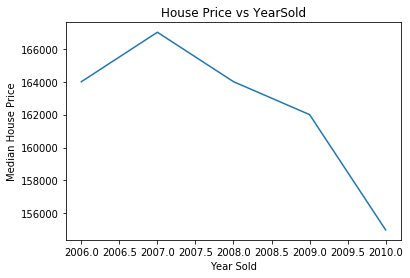

In [169]:
# Lets analyze the Temporal Datetime Variables
# We will check whether there is a relation between year the house is sold and the sales price. 
# General conceptions says that the price should be increasing with increasing year.

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [170]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

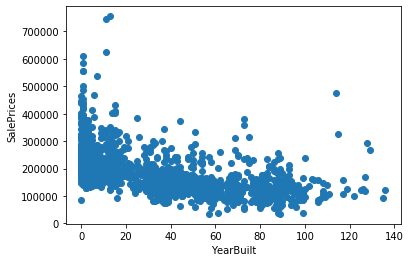

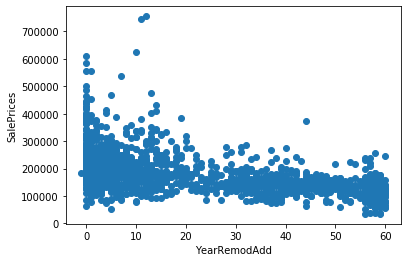

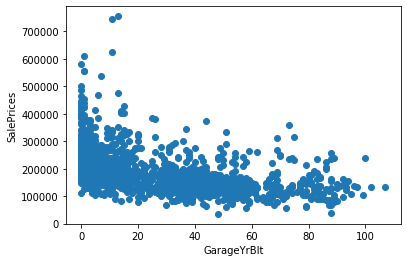

In [172]:
# Something is wrong! The above graph should not be like this! Lets compare all year features with sales price.
# Lets derive the duration of a house is sold from individual feature and check with sales price

for feature in year_feature:
    if feature != 'YrSold':
        data = dataset.copy()
        data[feature] = data['YrSold'] - data[feature]
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrices')
        plt.show()
        
    

#### Now these make sense! the newer the house and its upgrades, the more is the price!

In [173]:
# Numerical variables are usually of 2 type
# 1. Continous variable and 2. Discrete Variables
# Lets find those which will help in feature engineering.

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [174]:
# Did you notice how I have added 'Id' in year_feature array?
year_feature+['Id']

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'Id']

In [175]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


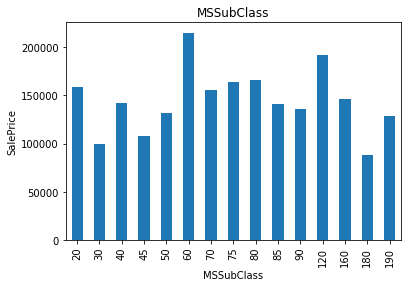

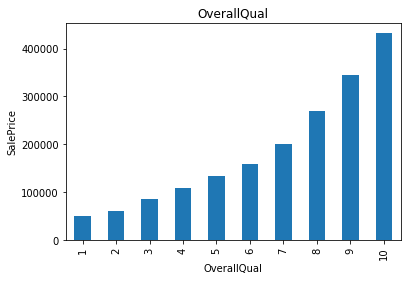

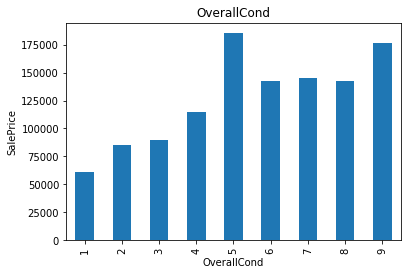

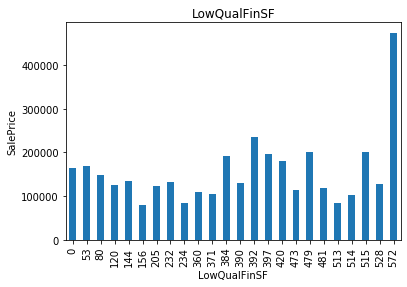

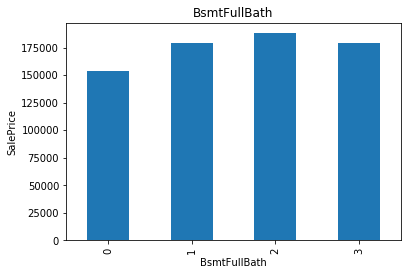

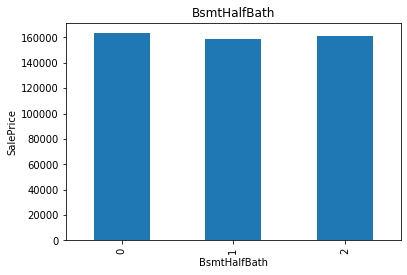

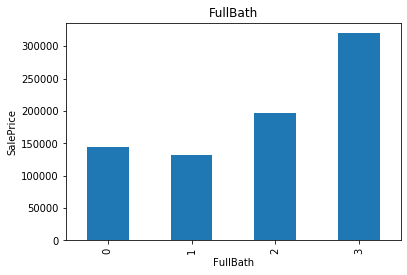

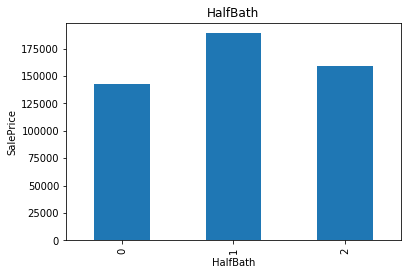

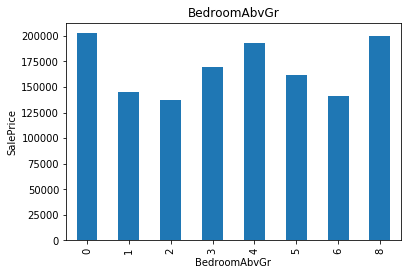

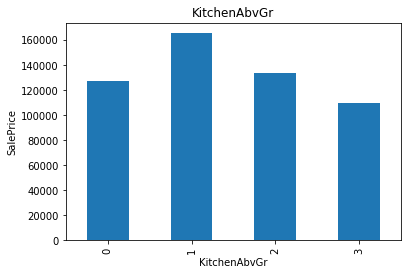

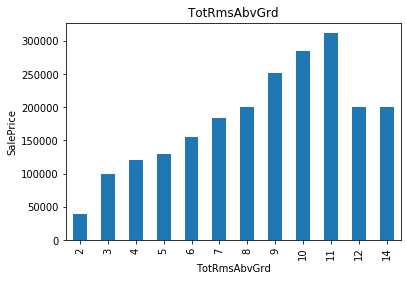

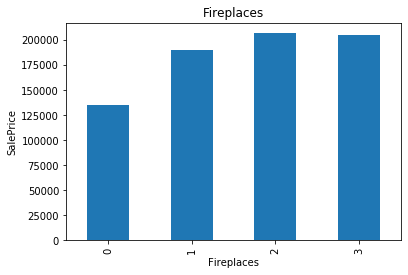

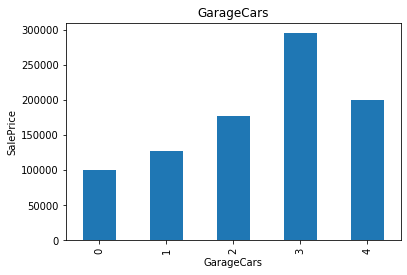

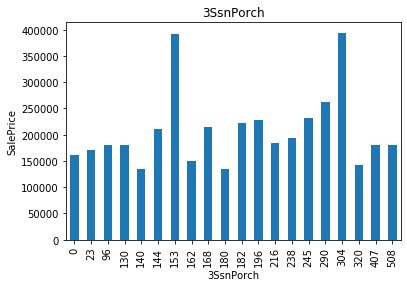

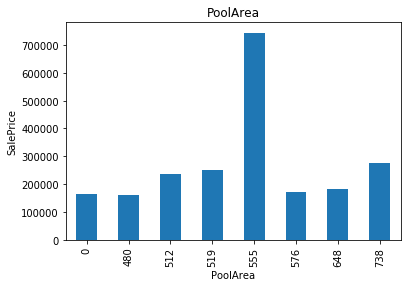

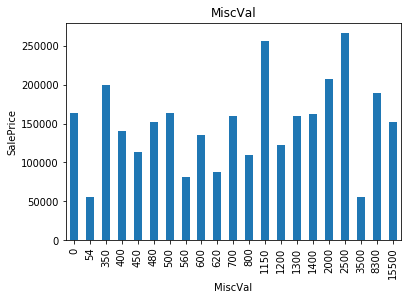

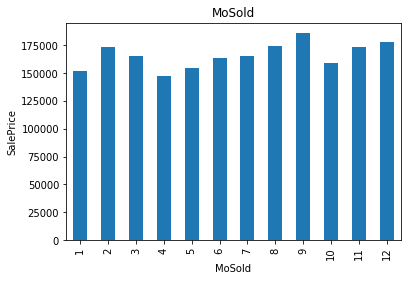

In [176]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()